In [149]:
import gym
from gym.envs.toy_text import frozen_lake
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import copy

In [52]:
random_seed = 42
np.random.seed(random_seed)

In [83]:
env_name = "FrozenLake-v1"
small_size, frozen_probability = 8, 0.8
map_small = frozen_lake.generate_random_map(small_size, frozen_probability)
env_small = gym.make(env_name, desc=map_small)
env_small.render()


SFFHFFFF
FFFFHHHF
FFFFFFFF
FFHFFFFF
FFFFFFFF
HFFFFFFH
FFFFFFFF
FHFHFHFG


In [137]:
map_small_2 = [[i for i in j] for j in map_small]
map_small_2 = [np.array(i) for i in map_small_2]

In [138]:
map_small_2 = np.array(map_small_2)
map_small_2

array([['S', 'F', 'F', 'H', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'H', 'H', 'H', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'H', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['H', 'F', 'F', 'F', 'F', 'F', 'F', 'H'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'H', 'F', 'H', 'F', 'H', 'F', 'G']], dtype='<U1')

C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/3480083076.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_small_2[map_small_2 == 'S'] = 0.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/3480083076.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_small_2[map_small_2 == 'F'] = 1.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/3480083076.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_small_2[map_small_2 == 'H'] = 2.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/3480083076.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_small_2[map_small_2 == 'G'] = 3.0


<Figure size 576x576 with 0 Axes>

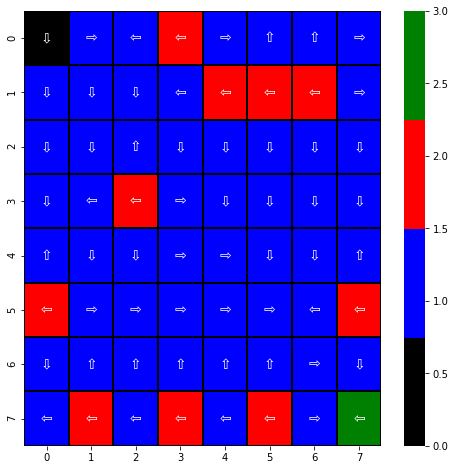

In [148]:
plt.figure(figsize=(small_size, small_size))
# plt.title("VI Optimal Policy, Frozen Lake")
map_small_2[map_small_2 == 'S'] = 0.0
map_small_2[map_small_2 == 'F'] = 1.0
map_small_2[map_small_2 == 'H'] = 2.0
map_small_2[map_small_2 == 'G'] = 3.0
map_small_2 = np.array(map_small_2, dtype='f')
plt.figure(figsize=(small_size, small_size))
# plt.title("VI Optimal Policy, Frozen Lake")
sns.heatmap(map_small_2, annot=vizpolicy_arrows_only, annot_kws={"size":14}, cmap=['black', 'blue', 'red', 'green'], fmt="", 
            linecolor='black', linewidths=1.0)
plt.show()

In [86]:
def extract_p_r_from_gym(env):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    
    P = np.zeros((n_actions, n_states, n_states))
    R = np.zeros((n_states, n_actions))

    for S in env.env.P:
        for A in env.env.P[S]:
            for val in env.env.P[S][A]:
                P[A][S][val[1]] += val[0]
                R[S][A] += val[2]
    return P, R

In [90]:
P, R = extract_p_r_from_gym(env_small)
env_small.observation_space.n, env_small.action_space.n, P, R

(64,
 4,
 array([[[0.66666667, 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.33333333, 0.33333333, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 1.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.33333333,
          0.33333333, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 1.        ]],
 
        [[0.33333333, 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 0.        , 0.33333333, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 1.        ,
          0.   

In [92]:
vi_solver = ValueIteration(P, R, gamma=0.9, epsilon=1.0e-5)
vi_solver.run()
vi_solver.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 1.0,
  'Time': 0.0,
  'Max V': 1.0,
  'Mean V': 0.03125,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 1.3,
  'Error': 0.6,
  'Time': 0.0,
  'Max V': 1.3,
  'Mean V': 0.05,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 1.5699999999999998,
  'Error': 0.2699999999999998,
  'Time': 0.0,
  'Max V': 1.5699999999999998,
  'Mean V': 0.06687499999999999,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 1.705,
  'Error': 0.21599999999999986,
  'Time': 0.0,
  'Max V': 1.705,
  'Mean V': 0.07953125,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 1.8103,
  'Error': 0.11339999999999997,
  'Time': 0.0,
  'Max V': 1.8103,
  'Mean V': 0.09142812500000001,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 1.8710499999999999,
  'Error': 0.09720000000000018,
  'Time': 0.0,
  'Max V': 1.8710499999999999,
  'Mean V': 0.101451875,
  'Iteration': 6},
 {'St

In [96]:
len(vi_solver.policy), np.array(list(vi_solver.policy)).reshape(small_size, small_size)

(64,
 array([[1, 2, 0, 0, 2, 3, 3, 2],
        [1, 1, 1, 0, 0, 0, 0, 2],
        [1, 1, 3, 1, 1, 1, 1, 1],
        [1, 0, 0, 2, 1, 1, 1, 1],
        [3, 1, 1, 2, 2, 1, 1, 3],
        [0, 2, 2, 2, 2, 2, 0, 0],
        [1, 3, 3, 3, 3, 3, 2, 1],
        [0, 0, 0, 0, 0, 0, 2, 0]]))

In [99]:
np.array(list(vi_solver.V)).reshape(small_size, small_size)

array([[0.02654477, 0.02878432, 0.03053184, 0.        , 0.01062397,
        0.02478987, 0.04722024, 0.08539238],
       [0.03315613, 0.03663407, 0.04245901, 0.04547404, 0.        ,
        0.        , 0.        , 0.11385857],
       [0.0407329 , 0.0465009 , 0.05942405, 0.10912251, 0.14811857,
        0.17686226, 0.18771509, 0.18027956],
       [0.04854522, 0.05484863, 0.        , 0.15620115, 0.20774565,
        0.25370897, 0.26857684, 0.23293889],
       [0.05842622, 0.08778521, 0.13413359, 0.20380416, 0.28257711,
        0.36937563, 0.40860982, 0.2749488 ],
       [0.        , 0.10005997, 0.15552465, 0.2405707 , 0.36480394,
        0.5400666 , 0.71770963, 0.        ],
       [0.05698152, 0.09022568, 0.14371324, 0.2332959 , 0.3933709 ,
        0.71313794, 1.44369011, 2.04729563],
       [0.04273396, 0.        , 0.06159091, 0.        , 0.1685872 ,
        0.        , 2.04729563, 0.        ]])

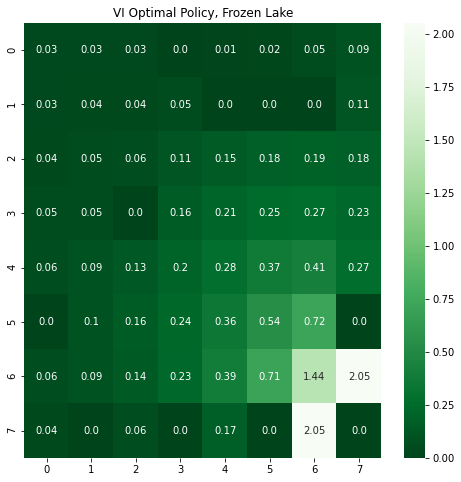

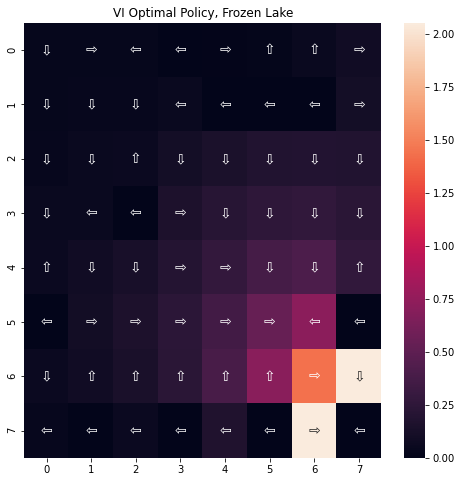

In [106]:
optimal_policy = vi_solver.policy
optimal_policy = np.array(list(vi_solver.policy)).reshape(small_size,small_size).astype(str)
optimalV = np.round(np.array(list(vi_solver.V)).reshape(small_size,small_size), 2)
optimal_policy[optimal_policy == '0'] = '⇦'
optimal_policy[optimal_policy == '1'] = '⇩'
optimal_policy[optimal_policy == '2'] = '⇨'
optimal_policy[optimal_policy == '3'] = '⇧'
vizpolicy = (np.asarray([str(v) for a, v in zip(optimal_policy.flatten(), optimalV.flatten())])).reshape(
        small_size,small_size)
vizpolicy_arrows_only = (np.asarray([a  for a in zip(optimal_policy.flatten())])).reshape(small_size,small_size)
plt.figure(figsize=(small_size, small_size))
plt.title("VI Optimal Policy, Frozen Lake")
sns.heatmap(optimalV, cmap="Greens_r", annot=vizpolicy, fmt="")
plt.show()

plt.figure(figsize=(small_size, small_size))
plt.title("VI Optimal Policy, Frozen Lake")
sns.heatmap(optimalV, annot=vizpolicy_arrows_only, annot_kws={"size":14}, fmt="")
plt.show()

In [175]:
def plot_frozen_lake(lake_map, policy, rewards, size, title_prefix):
    optimal_policy = np.array(list(policy), dtype='str').reshape(size, size)
    optimal_rewards = np.round(np.array(list(rewards)).reshape(size, size), 2)
    optimal_policy[optimal_policy == '0'] = '⇦'
    optimal_policy[optimal_policy == '1'] = '⇩'
    optimal_policy[optimal_policy == '2'] = '⇨'
    optimal_policy[optimal_policy == '3'] = '⇧'
    plt.figure(figsize=(size, size))
    plt.title(title_prefix + " Optimal Policy, Frozen Lake")
    map_local = copy.deepcopy(lake_map)
    map_local[map_small_2 == 'S'] = 0.0
    map_local[map_small_2 == 'F'] = 1.0
    map_local[map_small_2 == 'H'] = 2.0
    map_local[map_small_2 == 'G'] = 3.0
    map_local = np.array(map_local, dtype='f')
    sns.heatmap(map_local, annot=optimal_policy, annot_kws={"size":14}, cmap=['black', 'blue', 'red', 'green'], fmt="", 
                linecolor='black', linewidths=1.0)
    plt.figure(figsize=(size, size))
    plt.title(title_prefix + " Optimal Policy Rewards, Frozen Lake")
    sns.heatmap(optimal_rewards, cmap="Blues", annot=optimal_rewards, fmt="")
    plt.show()
    

C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'S'] = 0.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'F'] = 1.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'H'] = 2.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'G'] = 3.0


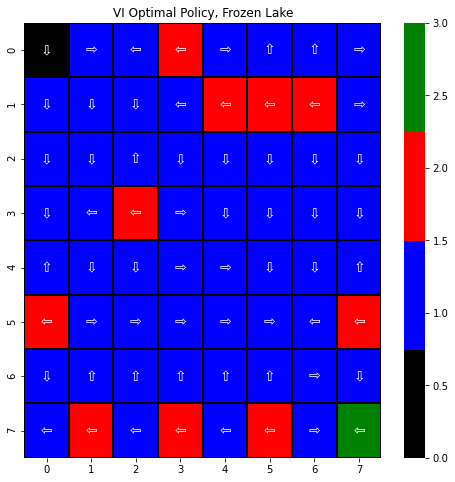

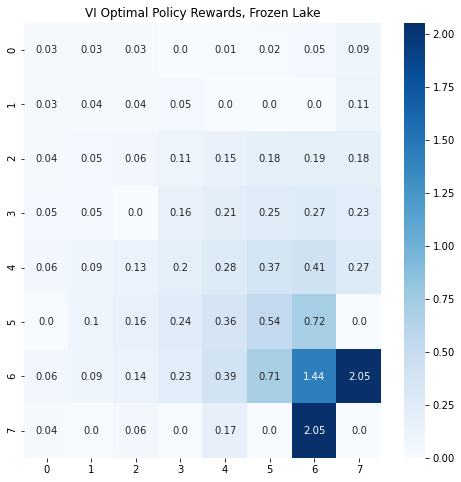

In [176]:
plot_frozen_lake(map_small_2, vi_solver.policy, vi_solver.V, small_size, "VI")

C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'S'] = 0.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'F'] = 1.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'H'] = 2.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'G'] = 3.0


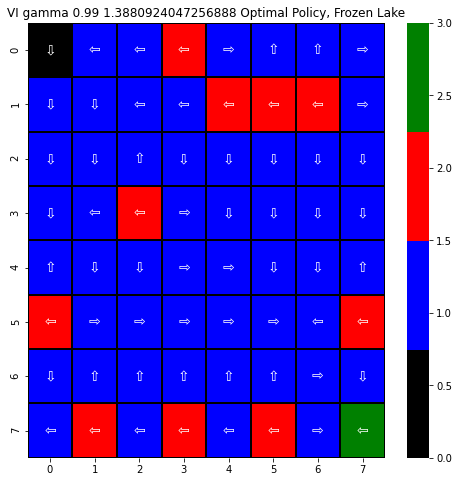

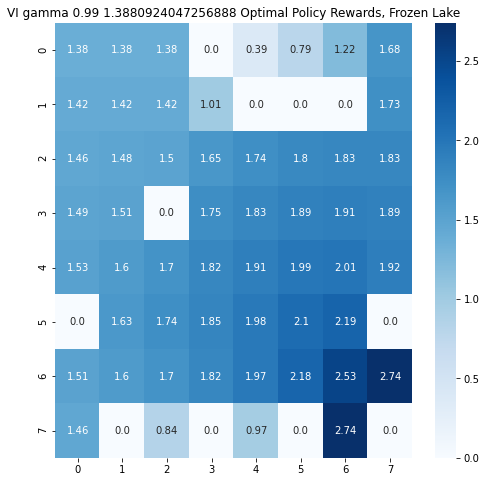

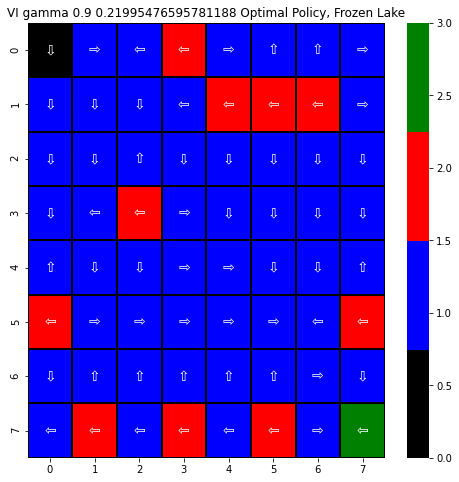

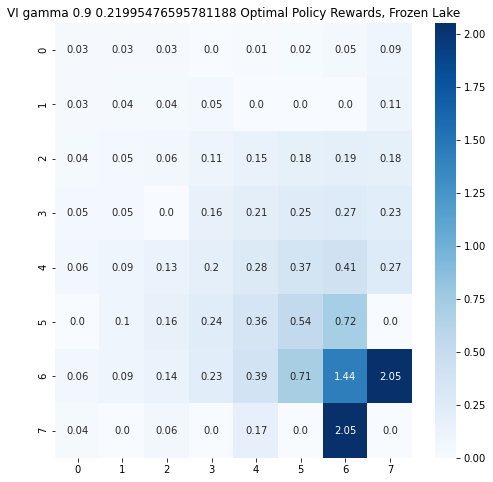

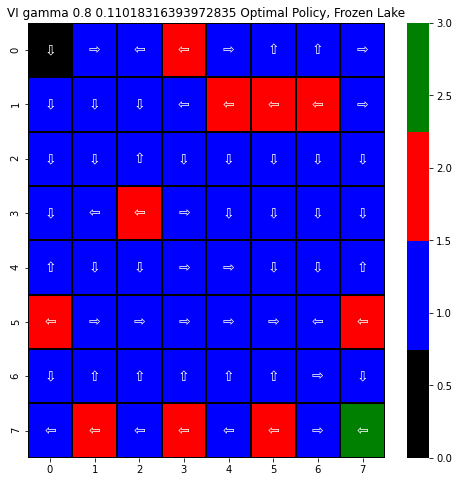

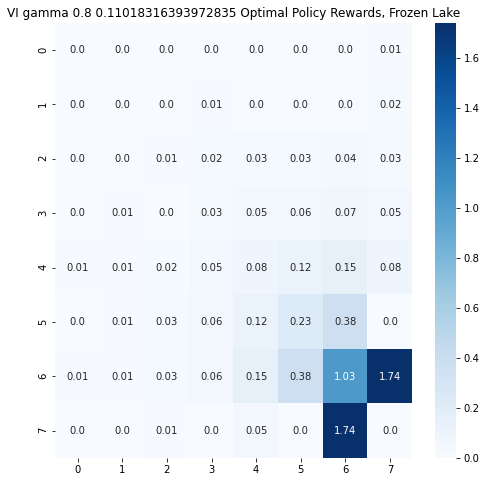

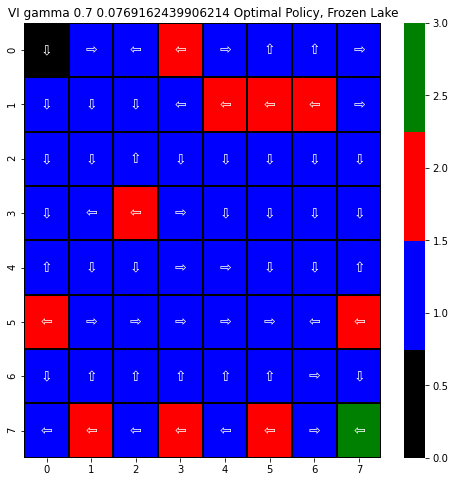

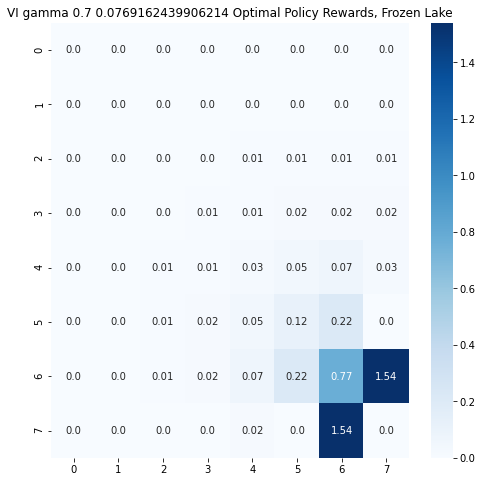

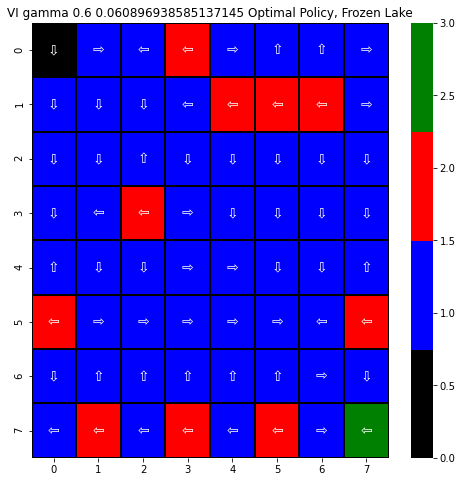

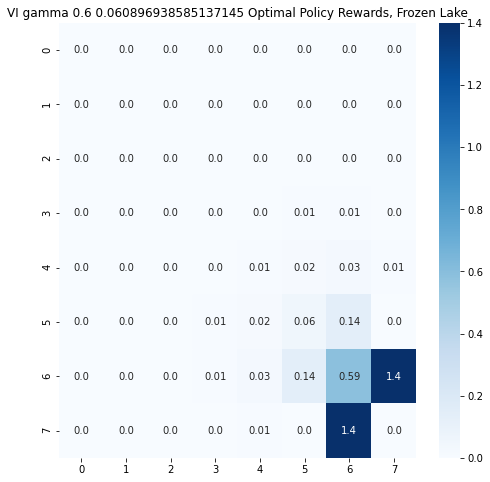

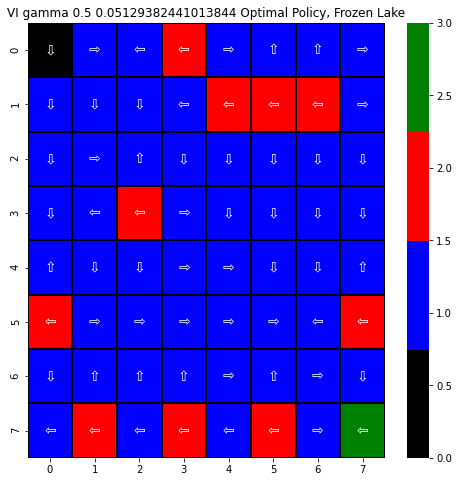

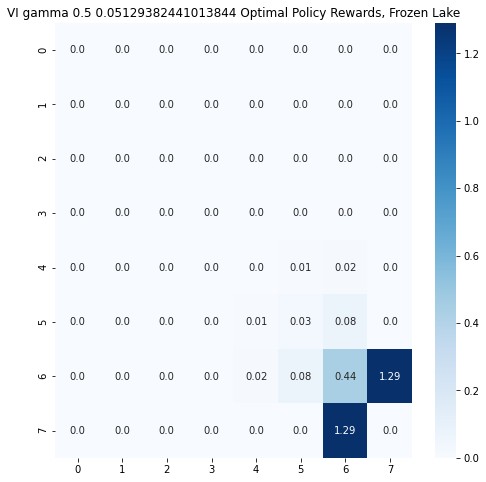

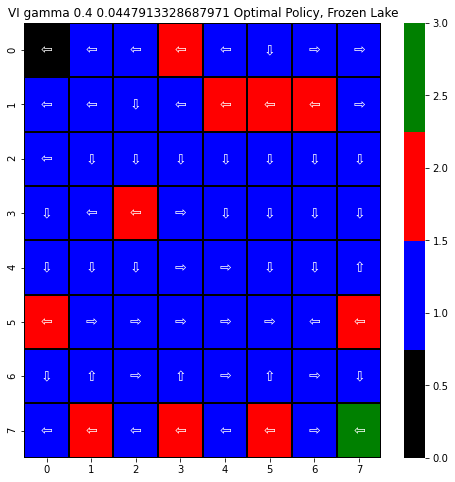

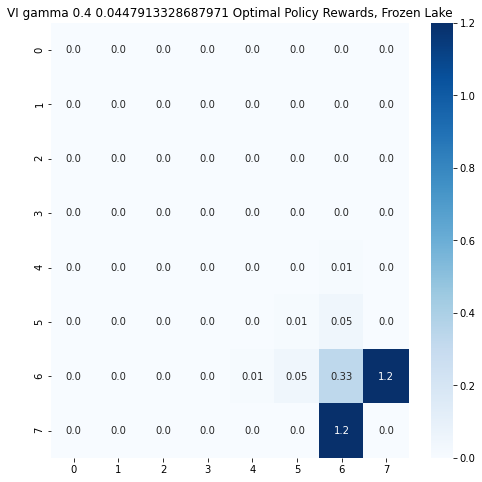

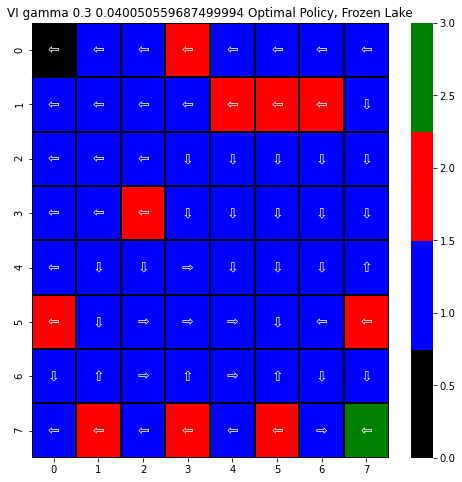

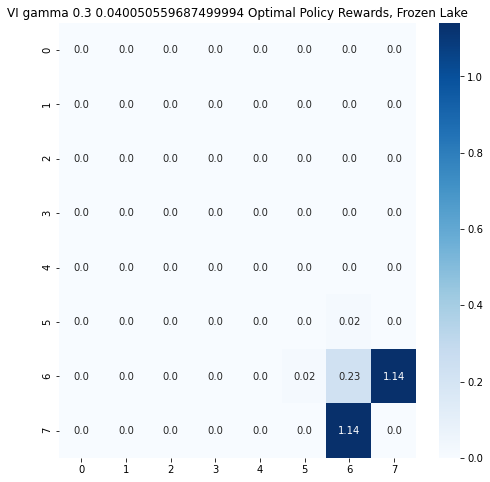

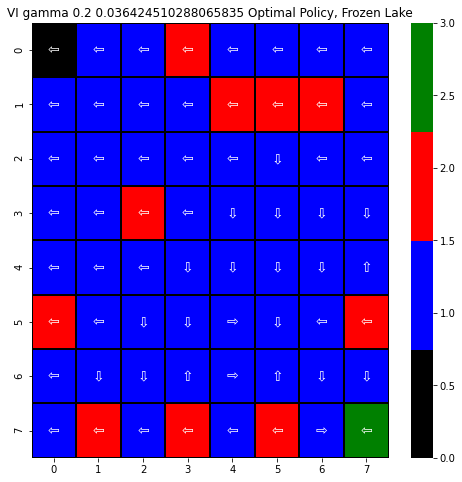

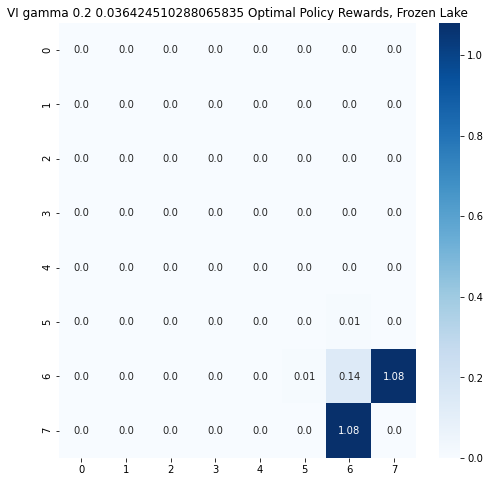

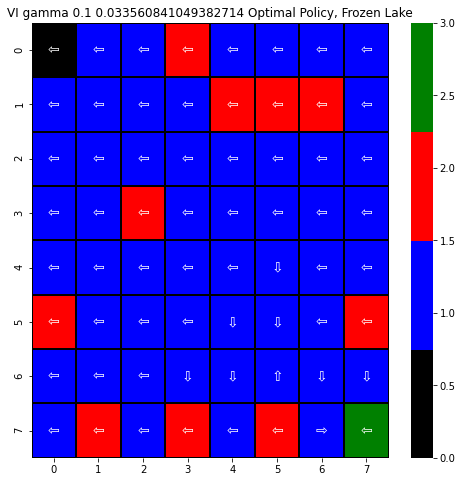

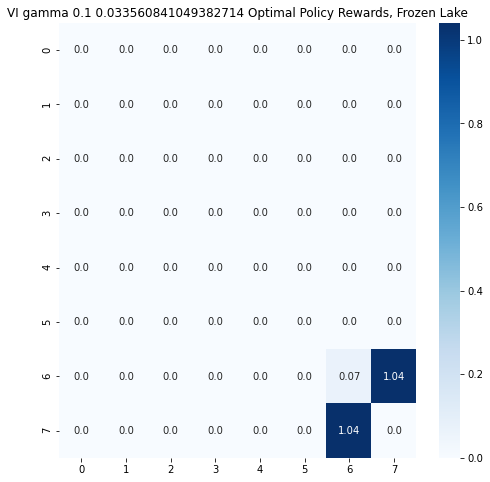

In [194]:
gamma_list = [0.99] + [round(1+(0.1*-i), 1) for i in range(1,10)]
for g in gamma_list:
    vi_solver = ValueIteration(P, R, gamma=g, epsilon=1.0e-5)
    vi_solver.run()
    plot_frozen_lake(map_small_2, vi_solver.policy, vi_solver.V, small_size, "VI gamma " + str(round(g, 2)) + " " + str(np.mean(vi_solver.V)))
#     vi_solver.run_stats

In [291]:
def evaluate_policy(env, policy, n_episodes=10000, max_iter=10000):
    success = 0
    for i in range(n_episodes):
        a = env_small.reset()
        for j in range(max_iter):
            a, reward, goal, _ = env.step(policy[a])
            if goal:
                if reward == 1:
                    success += 1
                break
    return success

In [297]:
success_rate = {}
for g in gamma_list:
    vi_solver = ValueIteration(P, R, gamma=g, epsilon=1.0e-5, max_iter=10000)
    vi_solver.run()
    s = evaluate_policy(env_small, vi_solver.policy)
    success_rate[g] = s
success_rate

{0.99: 6892,
 0.9: 6304,
 0.8: 6308,
 0.7: 6273,
 0.6: 6225,
 0.5: 5104,
 0.4: 2049,
 0.3: 0,
 0.2: 0,
 0.1: 0}

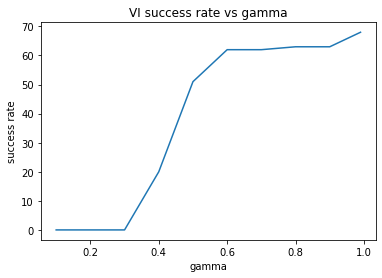

In [305]:
plt.figure()
plt.title("VI success rate vs gamma")
plt.xlabel("gamma")
plt.ylabel("success rate")
plt.plot(success_rate.keys(), [i//100 for i in success_rate.values()])

In [306]:
def get_vi_stats(P, R):
    stats = {}
    for g in gamma_list:
        vi = ValueIteration(P, R, gamma=g, epsilon=1.0e-5, max_iter=10000)
        vi.run()
        stats[g] = vi.run_stats
    return stats

In [307]:
stats = get_vi_stats(P, R)
stats

{0.99: [{'State': None,
   'Action': None,
   'Reward': 1.0,
   'Error': 1.0,
   'Time': 0.0,
   'Max V': 1.0,
   'Mean V': 0.03125,
   'Iteration': 1},
  {'State': None,
   'Action': None,
   'Reward': 1.33,
   'Error': 0.6599999999999999,
   'Time': 0.0,
   'Max V': 1.33,
   'Mean V': 0.051875000000000004,
   'Iteration': 2},
  {'State': None,
   'Action': None,
   'Reward': 1.6566999999999998,
   'Error': 0.32669999999999977,
   'Time': 0.0,
   'Max V': 1.6566999999999998,
   'Mean V': 0.07229374999999999,
   'Iteration': 3},
  {'State': None,
   'Action': None,
   'Reward': 1.836385,
   'Error': 0.28749599999999986,
   'Time': 0.0,
   'Max V': 1.836385,
   'Mean V': 0.08913921875,
   'Iteration': 4},
  {'State': None,
   'Action': None,
   'Reward': 1.99055473,
   'Error': 0.1660289399999999,
   'Time': 0.0,
   'Max V': 1.99055473,
   'Mean V': 0.10655743343749999,
   'Iteration': 5},
  {'State': None,
   'Action': None,
   'Reward': 2.0883932124999998,
   'Error': 0.15654157199999

Text(0, 0.5, 'Reward')

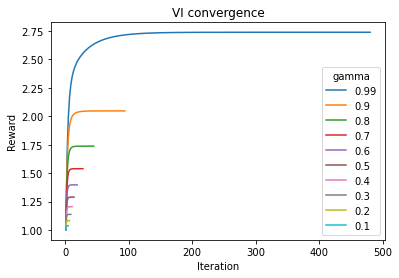

In [317]:
plt.figure()
for g in gamma_list:
    stat = stats[g]
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Reward'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("VI convergence")
plt.xlabel("Iteration")
plt.ylabel("Reward")

Text(0, 0.5, 'Mean Value')

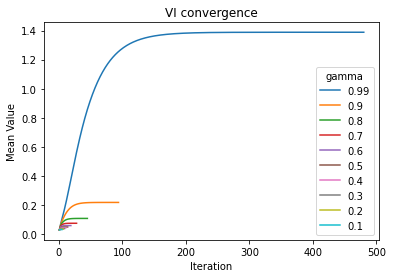

In [319]:
plt.figure()
for g in gamma_list:
    stat = stats[g]
    iterations = [s['Iteration'] for s in stat]
    iterations_rewards = [s['Mean V'] for s in stat]
    plt.plot(iterations, iterations_rewards)
plt.legend(gamma_list, title="gamma")
plt.title("VI convergence")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")

Text(0, 0.5, 'Time')

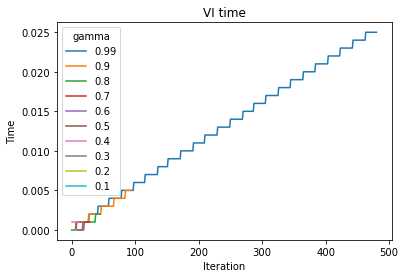

In [318]:
plt.figure()
for g in gamma_list:
    stat = stats[g]
    iterations = [s['Iteration'] for s in stat]
    iterations_time = [s['Time'] for s in stat]
    plt.plot(iterations, iterations_time)
plt.legend(gamma_list, title="gamma")
plt.title("VI time")
plt.xlabel("Iteration")
plt.ylabel("Time")

In [324]:
pi_solver = PolicyIteration(P, R, gamma=0.99, max_iter=10000)
pi_solver.run()
pi_solver.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.4925373134328357,
  'Error': 0.3912524491924211,
  'Time': 0.0019969940185546875,
  'Max V': 1.4925373134328357,
  'Mean V': 0.05707965255173812,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 2.4975487377443204,
  'Error': 0.22337501645372626,
  'Time': 0.0039980411529541016,
  'Max V': 2.4975487377443204,
  'Mean V': 0.3392510535294645,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 2.7095851631082204,
  'Error': 0.07725874911783148,
  'Time': 0.005001068115234375,
  'Max V': 2.7095851631082204,
  'Mean V': 1.17238817120128,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 2.736102480750268,
  'Error': 0.02495126985607854,
  'Time': 0.006996870040893555,
  'Max V': 2.736102480750268,
  'Mean V': 1.3632651819960406,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 2.739518083876459,
  'Error': 0.00042404547244045965,
  'Time': 0.00800013542175293,
  'Max V': 2.73951

C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'S'] = 0.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'F'] = 1.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'H'] = 2.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'G'] = 3.0


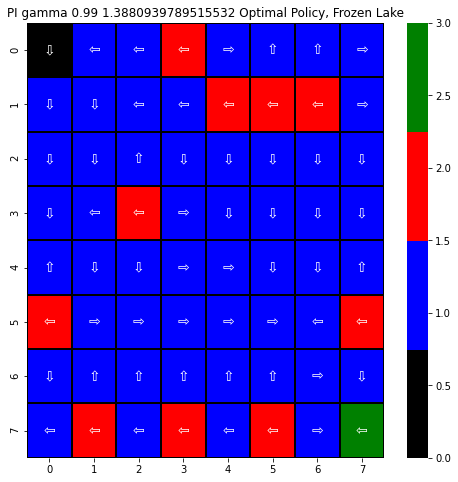

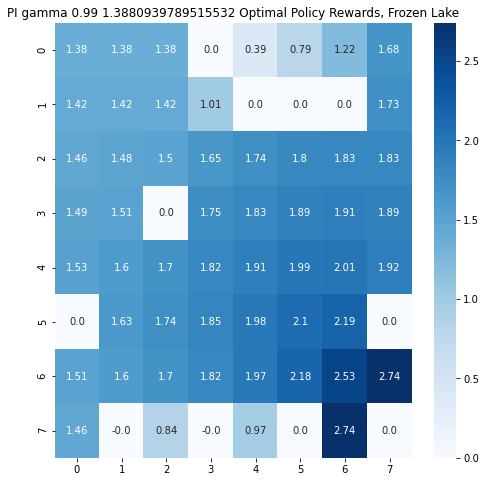

In [325]:
plot_frozen_lake(map_small_2, pi_solver.policy, pi_solver.V, small_size, "PI gamma " + str(round(0.99, 2)) + " " + str(np.mean(pi_solver.V)))

In [326]:
pi_solver = PolicyIteration(P, R, gamma=0.9, max_iter=10000)
pi_solver.run()
pi_solver.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.4285714285714288,
  'Error': 0.3428564977097266,
  'Time': 0.0019998550415039062,
  'Max V': 1.4285714285714288,
  'Mean V': 0.05193128038845253,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 2.032422271925411,
  'Error': 0.12143377280387435,
  'Time': 0.004999399185180664,
  'Max V': 2.032422271925411,
  'Mean V': 0.1421516224987238,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 2.045869671446507,
  'Error': 0.04077129011107121,
  'Time': 0.0060007572174072266,
  'Max V': 2.045869671446507,
  'Mean V': 0.1869435337730238,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 2.0467541798637763,
  'Error': 0.02128525302120174,
  'Time': 0.006998538970947266,
  'Max V': 2.0467541798637763,
  'Mean V': 0.2042150084660773,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 2.0472817312167697,
  'Error': 0.003970307736393244,
  'Time': 0.009000539779663086,
  'Max V': 2.04728

C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'S'] = 0.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'F'] = 1.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'H'] = 2.0
C:\Users\yasse\AppData\Local\Temp/ipykernel_22872/858800970.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  map_local[map_small_2 == 'G'] = 3.0


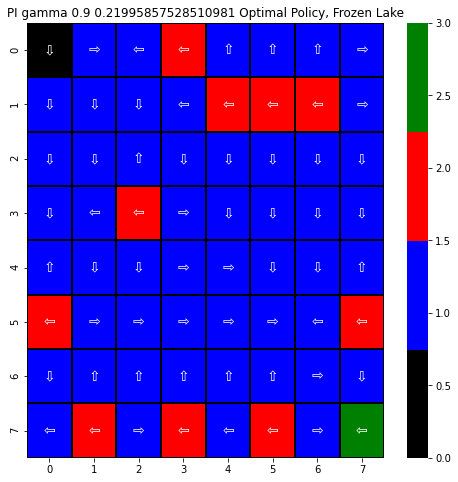

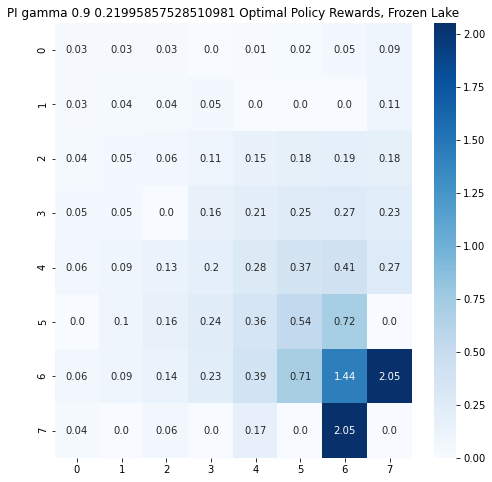

In [327]:
plot_frozen_lake(map_small_2, pi_solver.policy, pi_solver.V, small_size, "PI gamma " + str(round(0.9, 2)) + " " + str(np.mean(pi_solver.V)))

In [329]:
success_rate = {}
for g in gamma_list:
    pi_solver = PolicyIteration(P, R, gamma=g, max_iter=10000)
    pi_solver.run()
    s = evaluate_policy(env_small, pi_solver.policy)
    success_rate[g] = s
success_rate

{0.99: 6810,
 0.9: 6317,
 0.8: 6289,
 0.7: 6262,
 0.6: 6308,
 0.5: 5381,
 0.4: 4812,
 0.3: 4787,
 0.2: 4729,
 0.1: 4831}

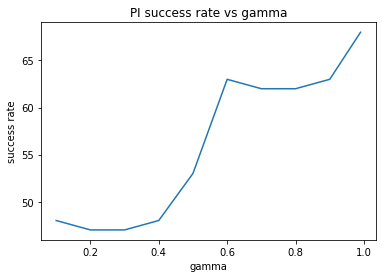

In [330]:
plt.figure()
plt.title("PI success rate vs gamma")
plt.xlabel("gamma")
plt.ylabel("success rate")
plt.plot(success_rate.keys(), [i//100 for i in success_rate.values()])